In [38]:
# libs importations
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# link of dataset : https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population

In [39]:
# load training dataset
training_data = pd.read_csv('data/energy_training.csv')
# load test dataset
test_data = pd.read_csv('data/energy_test.csv')


In [40]:
# show an extract of training data
training_data.head(5)

,Id,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [41]:
# show an extract of test data
test_data.head(5)

,Id,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,39816,Reunion,all_energy_types,2008,0.042565,0.008957,21.0127,816.325,52.142568,2.025693,2.562226
1,39817,Reunion,coal,2008,0.000000,0.000000,21.0127,816.325,52.142568,2.025693,0.000000
2,39818,Reunion,natural_gas,2008,0.000000,0.000000,21.0127,816.325,52.142568,2.025693,0.000000
3,39819,Reunion,petroleum_n_other_liquids,2008,0.033608,0.000000,21.0127,816.325,52.142568,2.025693,2.562226
4,39820,Reunion,nuclear,2008,NaN,NaN,21.0127,816.325,52.142568,2.025693,0.000000


In [42]:
# print dataset shape
print(f"training_data data shape: {training_data.shape}")
# print dataset shape
print(f"test_data data shape: {test_data.shape}")

training_data data shape: (39816, 11)
test_data data shape: (15624, 11)


#### Exploratory data analysis (EDA)

1. Inspection of training data

In [43]:
# List of drop column
cols_to_drop = ['Id']
# drop column
training_data_cleaned = training_data.drop(columns=cols_to_drop)
# Stats clean data
print(training_data_cleaned.describe())

               Year  Energy_consumption  Energy_production           GDP  \
count  39816.000000        31279.000000       3.127900e+04  26274.000000   
mean    1993.867089            1.374745       1.372467e+00    705.167540   
std        8.293845           13.570908       1.346456e+01   4785.443455   
min     1980.000000           -0.163438      -1.000000e-39      0.124958   
25%     1987.000000            0.000000       0.000000e+00      8.718240   
50%     1994.000000            0.013892       2.831476e-04     42.590700   
75%     2001.000000            0.185250       9.774674e-02    243.694700   
max     2008.000000          499.785999       4.953210e+02  90624.603666   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  3.224400e+04                 35562.000000             35562.000000   
mean   5.926655e+04                    68.883691                 3.682533   
std    4.261267e+05                   115.053418                 5.170068   
min    

In [44]:
# missing values 
missing_values = training_data.isnull().sum()
print(missing_values[missing_values > 0])

Energy_consumption              8537
Energy_production               8537
GDP                            13542
Population                      7572
Energy_intensity_per_capita     4254
Energy_intensity_by_GDP         4254
CO2_emission                    3414
dtype: int64


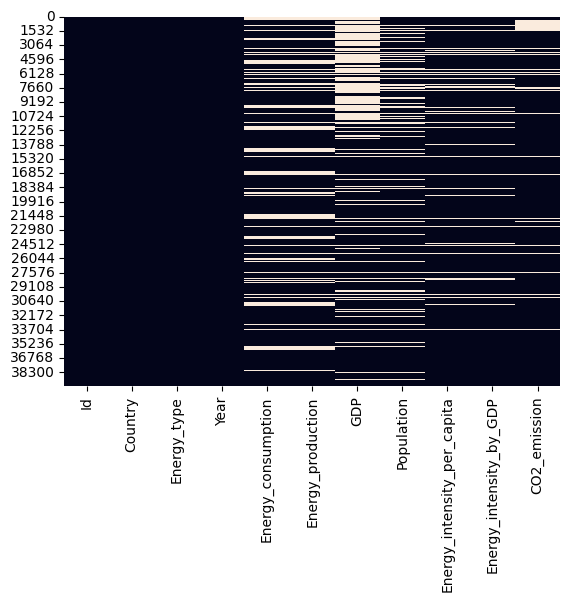

In [45]:
# visualize missing values
sns.heatmap(training_data.isnull(), cbar=False)
plt.show()

#commentaire à faire

In [46]:
# Print the age % of NaN values
energy_nan_percent = training_data['Energy_consumption'].isna().mean() * 100
print(f"Il y a {energy_nan_percent:.2f}% de valeur pour Energy_consumption manquante")

energy_production_nan_percent = training_data['Energy_production'].isna().mean() * 100
print(f"Il y a {energy_production_nan_percent:.2f}% de valeur pour Energy_production manquante")

gdp_nan_percent = training_data['GDP'].isna().mean() * 100
print(f"Il y a {gdp_nan_percent:.2f}% de valeur pour GDP manquante")

population_nan_percent = training_data['Population'].isna().mean() * 100
print(f"Il y a {population_nan_percent:.2f}% de valeur pour Population manquante")

Energy_intensity_per_capita_nan_percent = training_data['Energy_intensity_per_capita'].isna().mean() * 100
print(f"Il y a {Energy_intensity_per_capita_nan_percent:.2f}% de valeur pour Energy_intensity_per_capita manquante")

Energy_intensity_by_GDP_nan_percent = training_data['Energy_intensity_by_GDP'].isna().mean() * 100
print(f"Il y a {Energy_intensity_by_GDP_nan_percent:.2f}% de valeur pour Energy_intensity_by_GDP manquante")

CO2_emission_nan_percent = training_data['CO2_emission'].isna().mean() * 100
print(f"Il y a {CO2_emission_nan_percent:.2f}% de valeur pour CO2_emission manquante")

Il y a 21.44% de valeur pour Energy_consumption manquante
Il y a 21.44% de valeur pour Energy_production manquante
Il y a 34.01% de valeur pour GDP manquante
Il y a 19.02% de valeur pour Population manquante
Il y a 10.68% de valeur pour Energy_intensity_per_capita manquante
Il y a 10.68% de valeur pour Energy_intensity_by_GDP manquante
Il y a 8.57% de valeur pour CO2_emission manquante


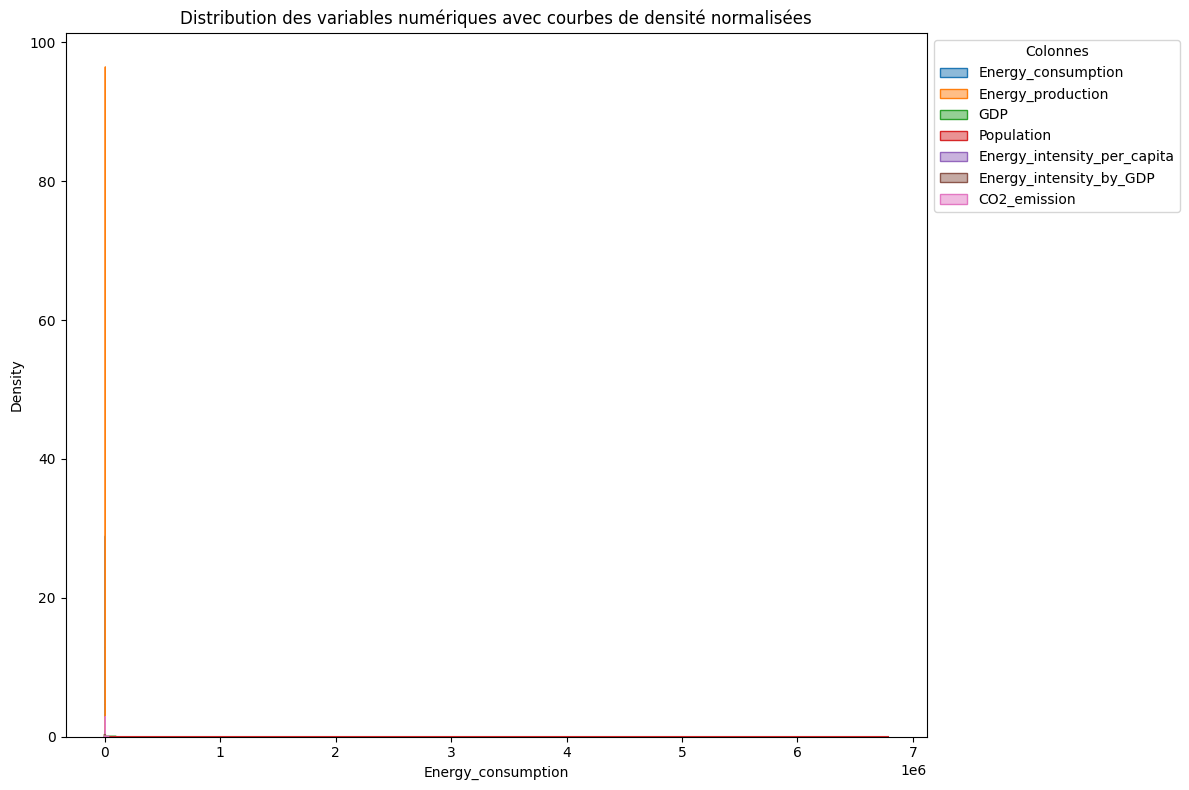

In [52]:
# Liste des colonnes numériques pour l'analyse de la distribution
numeric_columns = ['Energy_consumption', 'Energy_production', 'GDP', 'Population', 
                   'Energy_intensity_per_capita', 'Energy_intensity_by_GDP', 'CO2_emission']

# # Appliquer une transformation logarithmique pour réduire l'écart des valeurs extrêmes
# training_data_log = training_data[numeric_columns].apply(lambda x: np.log1p(x))  # Log(1 + x) pour éviter log(0)

# # Création du graphique
# plt.figure(figsize=(12, 8))

# # Plot de l'histogramme et courbe de densité pour chaque colonne
# for col in numeric_columns:
#     sns.histplot(training_data_log[col], kde=False, label=col, stat='density', element='step')

# # Limiter les axes X et Y pour zoomer sur la plage des valeurs plus pertinentes
# plt.xlim(0, 15)  # Ajuste cette plage selon tes données (après transformation logarithmique)
# plt.ylim(0, 0.4)  # Ajuste selon les densités visibles

# # Ajouter un titre et une légende
# plt.title('Distribution des variables numériques (log-transformed) avec courbes de densité normalisées')
# plt.legend(title="Colonnes", bbox_to_anchor=(1, 1), loc='upper left')

# plt.tight_layout()  # Pour bien espacer les éléments
# plt.show()


# Création du graphique
plt.figure(figsize=(12, 8))

# Plot de l'histogramme et courbe de densité pour chaque colonne
for col in numeric_columns:
    sns.histplot(training_data[col], kde=True, label=col, element='step', stat='density')

# Ajouter un titre et une légende
plt.title('Distribution des variables numériques avec courbes de densité normalisées')
plt.legend(title="Colonnes", bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()  # Pour bien espacer les éléments
plt.show()

2. Inspection of test data

In [ ]:
# List of drop column
cols_to_drop = ['Id']
# drop column
test_data_cleaned = test_data.drop(columns=cols_to_drop)
# Stats clean data
print(test_data_cleaned.describe())

               Year  Energy_consumption  Energy_production            GDP  \
count  15624.000000        13008.000000       13010.000000   13752.000000   
mean    2013.854839            1.929919           1.917937    1060.187526   
std        3.257091           19.244037          19.005439    7765.955133   
min     2008.000000           -0.071121           0.000000       0.173602   
25%     2011.000000            0.000230           0.000000      14.524925   
50%     2014.000000            0.034384           0.001638      64.631200   
75%     2017.000000            0.290209           0.153078     320.639275   
max     2019.000000          601.040490         611.508969  127690.247059   

         Population  Energy_intensity_per_capita  Energy_intensity_by_GDP  \
count  1.377000e+04                 14796.000000             14796.000000   
mean   7.050658e+04                    79.145963                 3.725318   
std    5.198154e+05                   110.146662                 2.735564  

In [ ]:
# missing values 
missing_values = test_data.isnull().sum()
print(missing_values[missing_values > 0])

Energy_consumption             2616
Energy_production              2614
GDP                            1872
Population                     1854
Energy_intensity_per_capita     828
Energy_intensity_by_GDP         828
CO2_emission                    412
dtype: int64


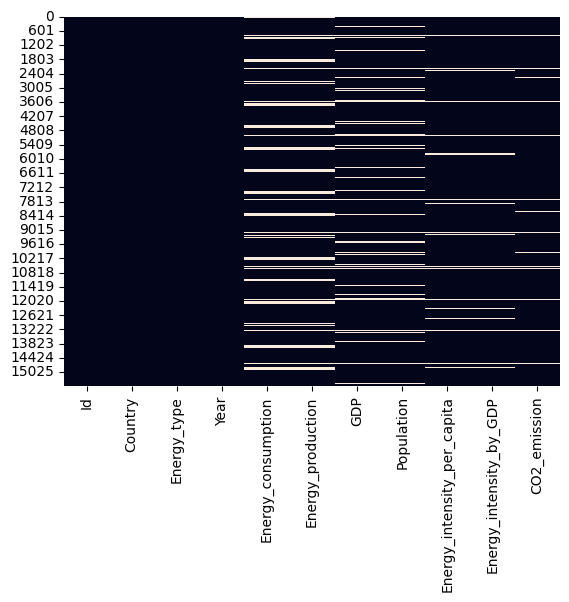

In [ ]:
# visualize missing values
sns.heatmap(test_data.isnull(), cbar=False)
plt.show()

In [ ]:
# Print the age % of NaN values
energy_nan_percent = test_data['Energy_consumption'].isna().mean() * 100
print(f"Il y a {energy_nan_percent:.2f}% de valeur pour Energy_consumption manquante")
energy_production_nan_percent = test_data['Energy_production'].isna().mean() * 100
print(f"Il y a {energy_production_nan_percent:.2f}% de valeur pour Energy_production manquante")
gdp_nan_percent = test_data['GDP'].isna().mean() * 100
print(f"Il y a {gdp_nan_percent:.2f}% de valeur pour GDP manquante")
population_nan_percent = test_data['Population'].isna().mean() * 100
print(f"Il y a {population_nan_percent:.2f}% de valeur pour Population manquante")
Energy_intensity_per_capita_nan_percent = test_data['Energy_intensity_per_capita'].isna().mean() * 100
print(f"Il y a {Energy_intensity_per_capita_nan_percent:.2f}% de valeur pour Energy_intensity_per_capita manquante")
Energy_intensity_by_GDP_nan_percent = test_data['Energy_intensity_by_GDP'].isna().mean() * 100
print(f"Il y a {Energy_intensity_by_GDP_nan_percent:.2f}% de valeur pour Energy_intensity_by_GDP manquante")
CO2_emission_nan_percent = test_data['CO2_emission'].isna().mean() * 100
print(f"Il y a {CO2_emission_nan_percent:.2f}% de valeur pour CO2_emission manquante")

Il y a 16.74% de valeur pour Energy_consumption manquante
Il y a 16.73% de valeur pour Energy_production manquante
Il y a 11.98% de valeur pour GDP manquante
Il y a 11.87% de valeur pour Population manquante
Il y a 5.30% de valeur pour Energy_intensity_per_capita manquante
Il y a 5.30% de valeur pour Energy_intensity_by_GDP manquante
Il y a 2.64% de valeur pour CO2_emission manquante
